In [20]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#obtaining my dataframe.
df = pd.read_csv('C:/Users/Samuel Kim/Downloads/heart.csv')
print(df)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [22]:
#CORRECTING THE DATA TYPES

In [23]:
#renaming the columns
renamed_columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 
                   'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved','exercise_induced_angina',
                   'st_depression', 'st_slope', 'Heart_Disease']
df.columns = renamed_columns

In [24]:
#correcting the data types
categorical_columns = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg',
                       'exercise_induced_angina', 'st_slope']
df[categorical_columns] = df[categorical_columns].astype('object')

In [25]:
print(df)

     age sex chest_pain_type  resting_blood_pressure  cholesterol  \
0     40   M             ATA                     140          289   
1     49   F             NAP                     160          180   
2     37   M             ATA                     130          283   
3     48   F             ASY                     138          214   
4     54   M             NAP                     150          195   
..   ...  ..             ...                     ...          ...   
913   45   M              TA                     110          264   
914   68   M             ASY                     144          193   
915   57   M             ASY                     130          131   
916   57   F             ATA                     130          236   
917   38   M             NAP                     138          175   

    fasting_blood_sugar rest_ecg  max_heart_rate_achieved  \
0                     0   Normal                      172   
1                     0   Normal                 

In [26]:
#REMOVING THE UNECESSARY COLUMNS OR VALUES

In [27]:
#renaming the values in the catergorical features
df['sex'].replace({'F':'female','M':'male'}, inplace=True)

df['chest_pain_type'].replace({'TA':'typical angina','ATA':'atypical angina','NAP':'non-anginal pain','ASY':'asymptomatic'}, inplace=True)

df['fasting_blood_sugar'].replace({0:'lower than 120mg/ml',1:'greater than 120mg/ml'}, inplace=True)

df['rest_ecg'].replace({0:'normal',1:'ST-T wave abnormality'}, inplace=True)

df['exercise_induced_angina'].replace({0:'no',1:'yes'}, inplace=True)

df['Heart_Disease'].replace({0:'heart_disease',1:'normal'}, inplace=True)

In [28]:
print(df)

     age     sex   chest_pain_type  resting_blood_pressure  cholesterol  \
0     40    male   atypical angina                     140          289   
1     49  female  non-anginal pain                     160          180   
2     37    male   atypical angina                     130          283   
3     48  female      asymptomatic                     138          214   
4     54    male  non-anginal pain                     150          195   
..   ...     ...               ...                     ...          ...   
913   45    male    typical angina                     110          264   
914   68    male      asymptomatic                     144          193   
915   57    male      asymptomatic                     130          131   
916   57  female   atypical angina                     130          236   
917   38    male  non-anginal pain                     138          175   

       fasting_blood_sugar rest_ecg  max_heart_rate_achieved  \
0      lower than 120mg/ml   Normal

In [29]:
#HANDLING MISSING VALUES

In [30]:
#total missing values in each column
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
Heart_Disease              0
dtype: int64

In [31]:
# Relation between numeric and categorical features
df_copy = df.copy()
df_copy['Heart_Disease'].replace({0:'No Heart Disease', 1:'Heart Disease'}, inplace=True)


target = df_copy.groupby(['Heart_Disease']).mean(['age', 'resting_blood_pressure', 'cholesterol',
                          'max_heart_rate_achieved', 'st_depression'])
gender = df_copy.groupby(['sex']).mean(['age', 'resting_blood_pressure', 'cholesterol',
                          'max_heart_rate_achieved', 'st_depression'])
chest_pain_type = df_copy.groupby(['chest_pain_type']).mean(['age', 'resting_blood_pressure', 'cholesterol',
                          'max_heart_rate_achieved', 'st_depression'])
fasting_blood_sugar = df_copy.groupby(['fasting_blood_sugar']).mean(['age', 'resting_blood_pressure', 'cholesterol',
                          'max_heart_rate_achieved', 'st_depression'])
exercise_induced_angina = df_copy.groupby(['exercise_induced_angina']).mean(['age', 'resting_blood_pressure', 'cholesterol',
                          'max_heart_rate_achieved', 'st_depression'])
st_slope = df_copy.groupby(['st_slope']).mean(['age', 'resting_blood_pressure', 'cholesterol',
                          'max_heart_rate_achieved', 'st_depression'])

relation = pd.concat([target, gender, chest_pain_type, exercise_induced_angina, st_slope]).reset_index()

rename_list = ['Heart_Disease', 'Heart_Disease',
               'Gender','Gender',
               'chest_pain_type','chest_pain_type','chest_pain_type','chest_pain_type',
               'fasting_blood_sugar','fasting_blood_sugar',
               'exercise_induced_angina','exercise_induced_angina','exercise_induced_angina']

relation.rename(index= dict(zip(list(range(13)),rename_list)), inplace=True, columns={'index':'values'})
relation.index.names = ['Categorical Features']
relation = relation.round(2)
relation.reset_index(inplace=True)

relation

,Categorical Features,values,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression
0,Heart_Disease,heart_disease,50.55,130.18,227.12,148.15,0.41
1,Heart_Disease,normal,55.90,134.19,175.94,127.66,1.27
2,Gender,female,52.49,132.21,241.20,146.14,0.67
3,Gender,male,53.78,132.45,187.51,134.33,0.95
4,chest_pain_type,asymptomatic,54.96,133.23,186.65,128.48,1.16
5,chest_pain_type,atypical angina,49.24,130.62,233.05,150.21,0.31
6,chest_pain_type,non-anginal pain,53.31,130.96,197.44,143.24,0.67
7,chest_pain_type,typical angina,54.83,136.41,207.07,147.89,1.04
8,fasting_blood_sugar,N,51.84,130.03,201.88,144.57,0.53
9,fasting_blood_sugar,Y,55.98,135.88,194.26,125.36,1.42


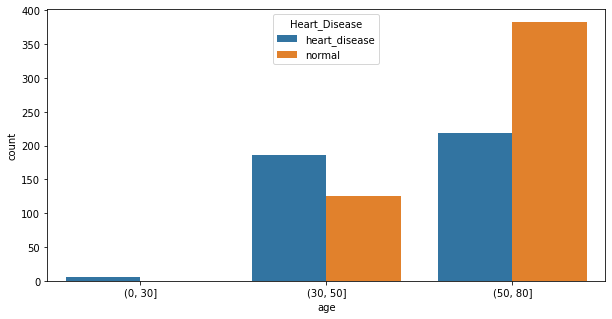

In [32]:
#Adults age 50 and older are more likely than younger people to have heart disease
plt.figure(figsize=(10,5))
bins=[0,30,50,80]
sns.countplot(x=pd.cut(df.age,bins=bins),hue=df.Heart_Disease)
plt.show()

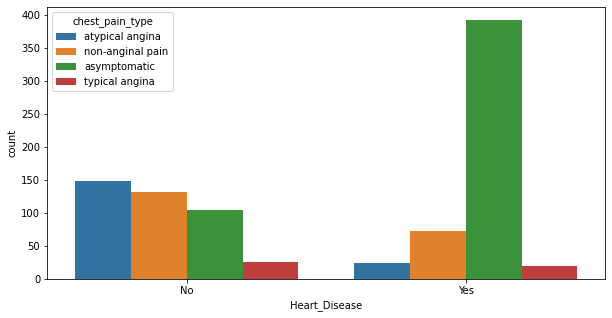

In [33]:
#Asymptomatic is the most common type of chest pain among patients with heart disease 
plt.figure(figsize=(10,5))
sns.countplot(x=df.Heart_Disease,hue=df.chest_pain_type)
plt.xticks(np.arange(2), ['No', 'Yes']) 
plt.show()

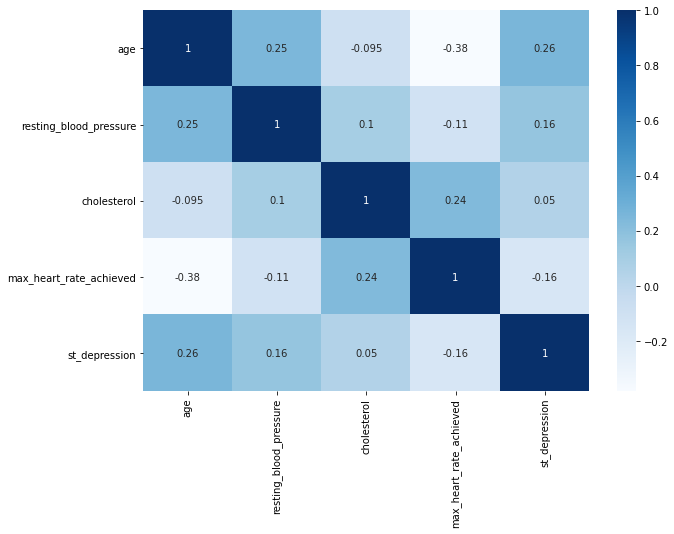

In [37]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True,cmap='Blues')
plt.show()